# Market Analysis

In [1]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Configurations
np.random.seed(1)
pd.set_option('display.max_columns', None)

In [3]:
# Global variables
MAX_CLUSTERS = 10

In [4]:
# Load the dataset
dataframe = pd.read_csv('../datasets/superstore.csv')
dataframe.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


## 1. Data Manipulation

In [5]:
# Create dataframe for manipulation
dataframe_manipulation = dataframe.copy()

In [6]:
# String to date
dataframe_manipulation[['Order Date', 'Ship Date']] = \
    dataframe[['Order Date', 'Ship Date']].apply(pd.to_datetime)

In [7]:
# Order to ship days
dataframe_manipulation['Order to Ship Days'] = (
    dataframe_manipulation['Ship Date'] - dataframe_manipulation['Order Date']
).dt.days

In [8]:
# Get order year
dataframe_manipulation['Order Year'] = \
    dataframe_manipulation["Order Date"].dt.year

In [9]:
# Sort by order date
dataframe_manipulation = dataframe_manipulation.sort_values('Order Date')

In [10]:
# Group by country
groupby_country = dataframe_manipulation.groupby('Country')

In [11]:
# Create market dataframe
dataframe_market = pd.DataFrame()

In [12]:
# Number of orders
dataframe_market['No of Orders'] = groupby_country['Order ID'].nunique()

In [13]:
# Total sales
dataframe_market['Total Sales'] = groupby_country['Sales'].sum()

In [14]:
# Total costs
dataframe_market['Total Costs'] = groupby_country['Shipping Cost'].sum()

In [15]:
# Average discount
dataframe_market['Average Discount'] = groupby_country['Discount'].mean()

In [16]:
# Drop duplicated orders
dataframe_order = \
    dataframe_manipulation.drop_duplicates(subset=['Order Date', 'Customer ID'])
groupby_order = dataframe_order.groupby('Country')

In [17]:
# Minimum order date
dataframe_market['Min Order Date'] = groupby_order['Order Date'].min()

In [18]:
# Maximum order date
dataframe_market['Max Order Date'] = groupby_order['Order Date'].max()

In [19]:
# Median order date
dataframe_market['Median Order Date'] = groupby_order['Order Date'].quantile(0.5)

In [20]:
# Number of cities
dataframe_market['No of Cities'] = groupby_country['City'].nunique()

In [21]:
# Total profit
dataframe_market['Total Profit'] = groupby_country['Profit'].sum()

In [22]:
# Average order to ship days
dataframe_market['Average Order to Ship Days'] = groupby_order['Order to Ship Days'].mean()

In [23]:
# Relationship days
dataframe_market['Relationship Days'] = (
    pd.to_datetime('2016-01-01') - dataframe_market['Min Order Date']
).dt.days

In [24]:
# Order of frequency
dataframe_market['Order Frequency'] = \
    dataframe_market['Relationship Days'] / dataframe_market['No of Orders']

In [25]:
# Days since last order
dataframe_market['Days Since Last Order'] = (
    pd.to_datetime('2016-01-01') - dataframe_market['Max Order Date']
).dt.days

In [26]:
# Sales contribution
dataframe_market['Sales Contribution'] = \
    dataframe_market['Total Sales'] / dataframe_market['Total Sales'].sum()

In [27]:
# Average sales
dataframe_market['Average Sales Value'] = \
    dataframe_market['Total Sales'] / dataframe_market['No of Orders']

## 2. Visualizations

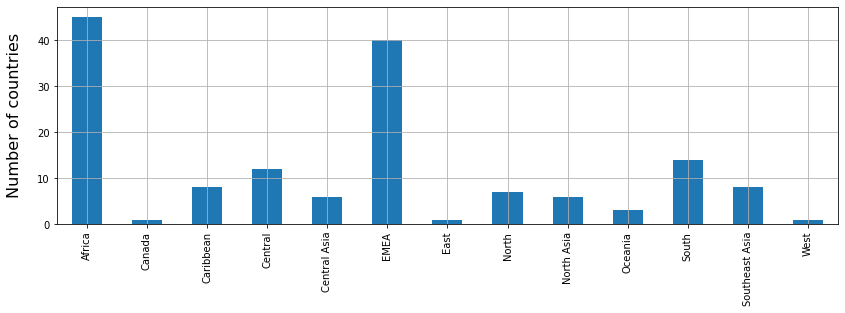

In [28]:
# Number of countries per region
plt.figure(figsize=(14, 4))
dataframe.groupby('Region')['Country'].nunique().plot(kind='bar')
plt.ylabel('Number of countries', size=16, labelpad=15)
plt.xlabel('')
plt.grid()
plt.show()

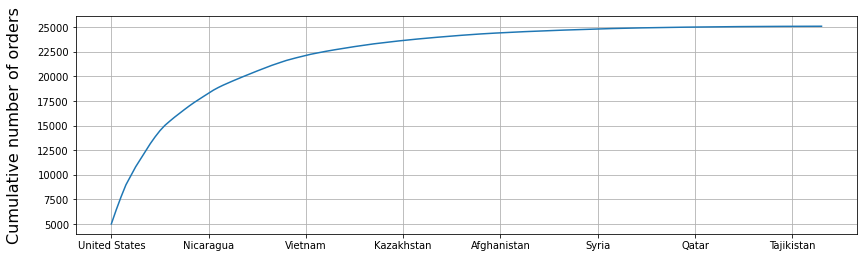

In [29]:
# Cumulative number of orders
plt.figure(figsize=(14, 4))
dataframe_market['No of Orders'].sort_values(ascending=False).cumsum().plot()
plt.ylabel('Cumulative number of orders', size=16, labelpad=15)
plt.xlabel('')
plt.grid()
plt.show()

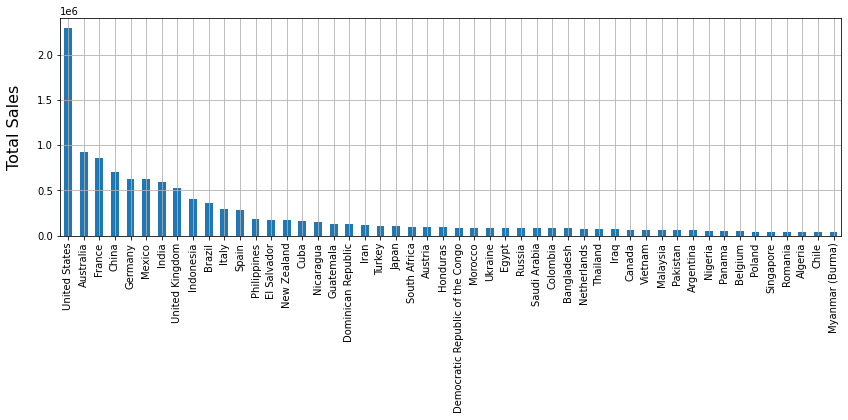

In [30]:
# Top 50 sales
plt.figure(figsize=(14, 4))
dataframe_market['Total Sales'].sort_values(ascending=False)[:50].plot(kind='bar')
plt.ylabel('Total Sales', size=16, labelpad=15)
plt.xlabel('')
plt.grid()
plt.show()

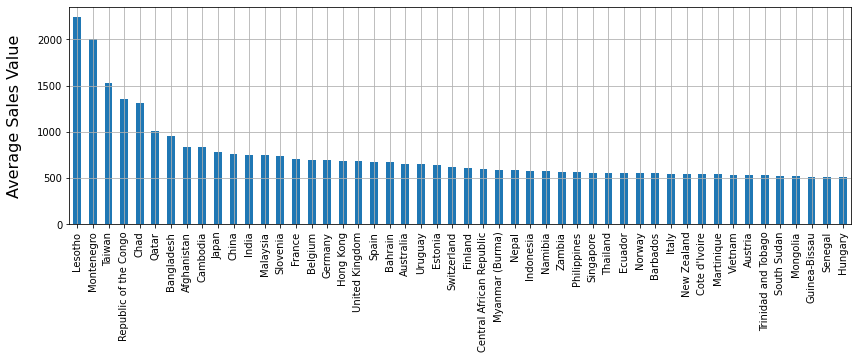

In [31]:
# Sales per order
plt.figure(figsize=(14, 4))
dataframe_market['Average Sales Value'].sort_values(ascending=False)[:50].plot(kind='bar')
plt.ylabel('Average Sales Value', size=16, labelpad=15)
plt.xlabel('')
plt.grid()
plt.show()

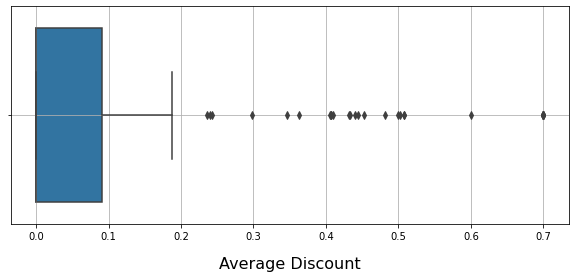

In [32]:
# Average discount
plt.figure(figsize=(10, 4))
sns.boxplot(x='Average Discount', data=dataframe_market)
plt.xlabel('Average Discount', size=16, labelpad=15)
plt.ylabel('')
plt.grid()
plt.show()

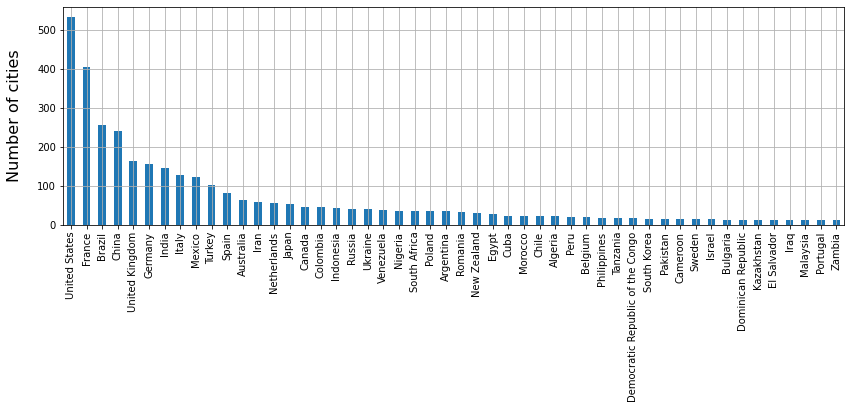

In [33]:
# Number of cities in the top 50
plt.figure(figsize=(14, 4))
dataframe_market['No of Cities'].sort_values(ascending=False)[:50].plot(kind='bar')
plt.ylabel('Number of cities', size=16, labelpad=15)
plt.xlabel('')
plt.grid()
plt.show()

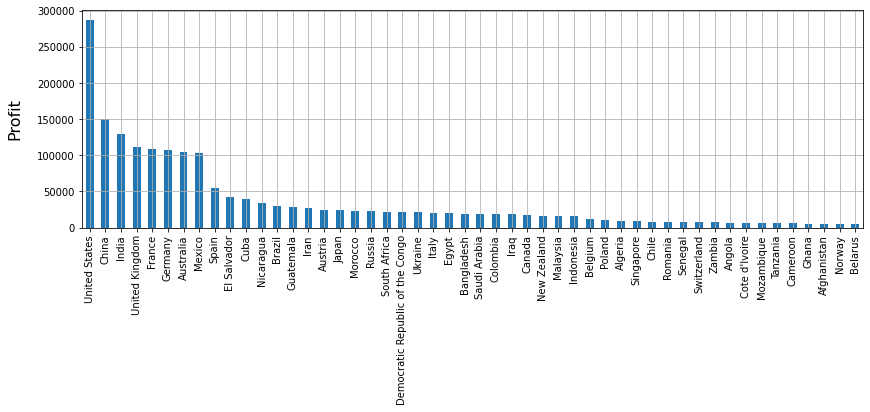

In [34]:
# Most profitable countries
plt.figure(figsize=(14, 4))
dataframe_market['Total Profit'].sort_values(ascending=False)[:50].plot(kind='bar')
plt.ylabel('Profit', size=16, labelpad=15)
plt.xlabel('')
plt.grid()
plt.show()

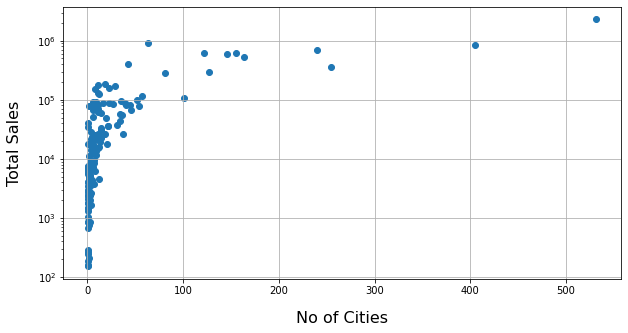

In [35]:
# More cities, more sales?
plt.figure(figsize=(10, 5))
plt.scatter(dataframe_market['No of Cities'], dataframe_market['Total Sales'])
plt.yscale('log')
plt.ylabel('Total Sales', size=16, labelpad=15)
plt.xlabel('No of Cities', size=16, labelpad=15)
plt.grid()
plt.show()

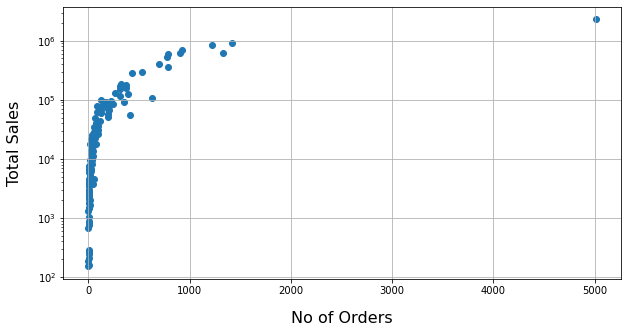

In [36]:
# More orders, more sales?
plt.figure(figsize=(10, 5))
plt.scatter(dataframe_market['No of Orders'], dataframe_market['Total Sales'])
plt.yscale('log')
plt.ylabel('Total Sales', size=16, labelpad=15)
plt.xlabel('No of Orders', size=16, labelpad=15)
plt.grid()
plt.show()

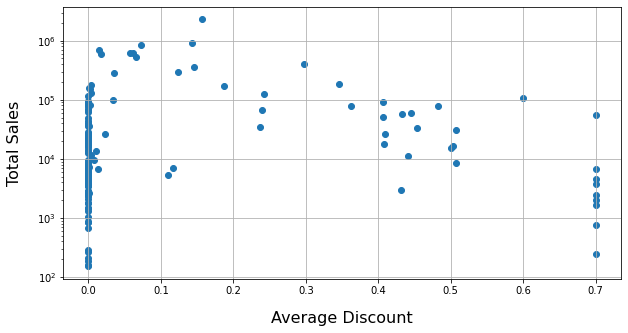

In [37]:
# More discount, more sales?
plt.figure(figsize=(10, 5))
plt.scatter(dataframe_market['Average Discount'], dataframe_market['Total Sales'])
plt.yscale('log')
plt.ylabel('Total Sales', size=16, labelpad=15)
plt.xlabel('Average Discount', size=16, labelpad=15)
plt.grid()
plt.show()

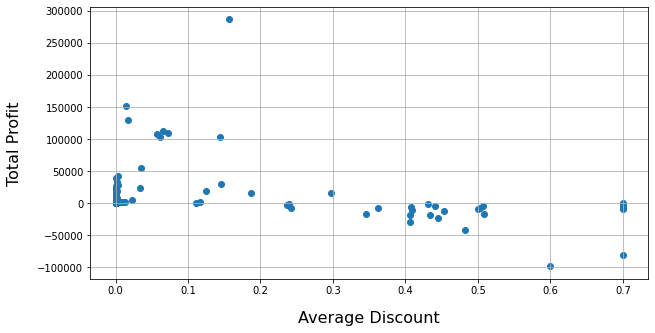

In [38]:
# What about profit?
plt.figure(figsize=(10, 5))
plt.scatter(dataframe_market['Average Discount'], dataframe_market['Total Profit'])
plt.ylabel('Total Profit', size=16, labelpad=15)
plt.xlabel('Average Discount', size=16, labelpad=15)
plt.grid()
plt.show()

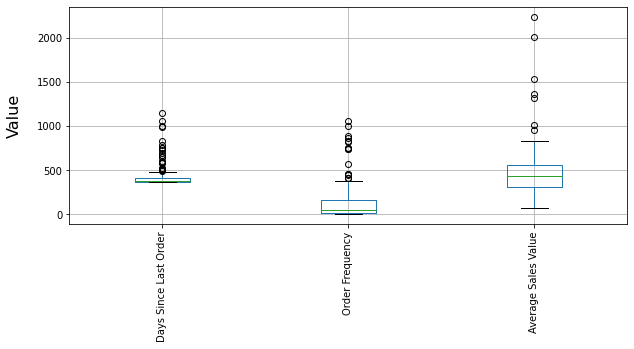

In [39]:
# Recenty, Frequency and Monetary
FEATURES = [
    'Days Since Last Order',
    'Order Frequency',
    'Average Sales Value'
]
plt.figure(figsize=(10, 4))
dataframe_market[FEATURES].boxplot()
plt.ylabel('Value', size=16, labelpad=15)
plt.xticks([1, 2, 3], FEATURES, rotation=90)
plt.show()


In [40]:
# Overall information
print(f'number of customers: {dataframe["Customer ID"].nunique()}')
print(f'number of orders: {dataframe["Order ID"].nunique()}')
print(f'number of segments: {dataframe["Segment"].nunique()}')
print(f'number of countries: {dataframe["Country"].nunique()}')
print(f'number of regions: {dataframe["Region"].nunique()}')
print(f'number of products: {dataframe["Product ID"].nunique()}')
print(f'number of product categories: {dataframe["Category"].nunique()}')
print(f'total sales: {dataframe["Sales"].sum():.0f}')
print(f'total costs: {dataframe["Shipping Cost"].sum():.0f}')
print(f'total profit: {dataframe["Profit"].sum():.0f}')
print(f'average discount: {dataframe["Discount"].mean():.3f}')

number of customers: 1590
number of orders: 25035
number of segments: 3
number of countries: 147
number of regions: 13
number of products: 10292
number of product categories: 3
total sales: 12642502
total costs: 1352821
total profit: 1467457
average discount: 0.143


## 3. Market Segmentation

In [41]:
# Selecting RFM features
x = dataframe_market[[
    'Days Since Last Order',
    'Order Frequency',
    'Average Sales Value'
]]

In [42]:
# Feature engineering
x_transformed = x.apply(lambda x: np.log1p(x + 1))

In [43]:
# Normalization
x_norm = StandardScaler().fit_transform(x_transformed)

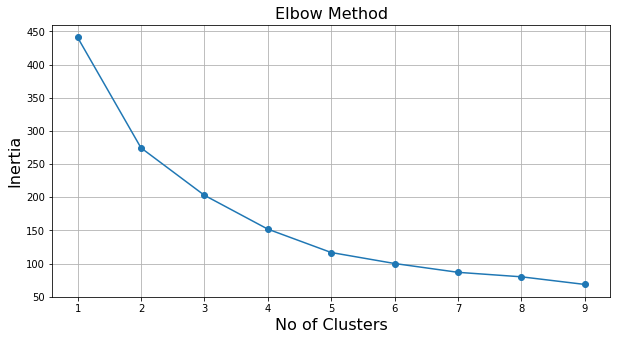

In [44]:
# Compute elbow method

inertias = []
for k in range(1, MAX_CLUSTERS):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(x_norm)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, MAX_CLUSTERS), inertias, marker='o')
plt.title('Elbow Method', size=16)
plt.xlabel('No of Clusters', size=16)
plt.ylabel('Inertia', size=16)
plt.grid()
plt.show()

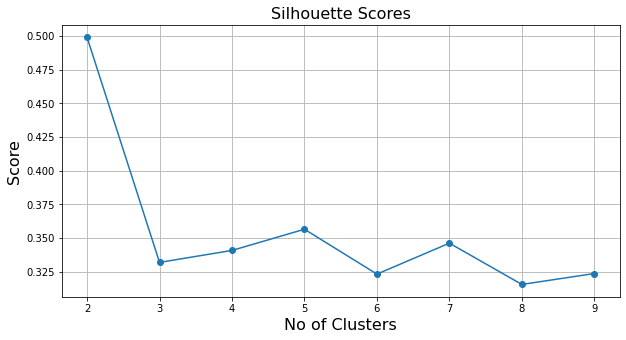

In [45]:
# Compute silhouette score

silhouettes = []
for k in range(2, MAX_CLUSTERS):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(x_norm)
    score = silhouette_score(x_norm, kmeans.labels_)
    silhouettes.append(score)

plt.figure(figsize=(10, 5))
plt.plot(range(2, MAX_CLUSTERS), silhouettes, marker='o')
plt.title('Silhouette Scores', size=16)
plt.xlabel('No of Clusters', size=16)
plt.ylabel('Score', size=16)
plt.grid()
plt.show()

In [46]:
# Fitting KMeans
N_CLUSTERS = 5  # Based on silhouette score
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=1)
_ = kmeans.fit(x_norm)

In [47]:
# Predict clusters
x_copy = x.copy()
x_copy['Cluster'] = kmeans.predict(x_norm)

In [48]:
# Get total profit
x_copy['Sales'] = dataframe_market['Total Sales']

In [49]:
# Group by cluster
groupby_clusters = x_copy.groupby('Cluster')

In [50]:
# Create segmentation dataframe
x_segmentation = pd.DataFrame()

In [51]:
# Number of cities
x_segmentation['No of Countries'] = groupby_clusters.size()

In [52]:
# Mean order frequency
x_segmentation['Mean Order Frequency'] = groupby_clusters['Order Frequency'].mean()

In [53]:
# Mean days since last order
x_segmentation['Mean Days Since Last Order'] = groupby_clusters['Days Since Last Order'].mean()

In [54]:
# Mean average sales value
x_segmentation['Mean Average Sales Value'] = groupby_clusters['Average Sales Value'].mean()

In [55]:
# Sales percentage
x_segmentation['Sales Pct'] = (
    groupby_clusters['Sales'].sum() / groupby_clusters['Sales'].sum().sum()
)

In [56]:
# Sales per country
x_segmentation['Sales Per Country'] = (
    groupby_clusters['Sales'].sum() / groupby_clusters.size()
)

In [57]:
# Print data
x_segmentation.head()

,No of Countries,Mean Order Frequency,Mean Days Since Last Order,Mean Average Sales Value,Sales Pct,Sales Per Country
Cluster,,,,,,
0,27,81.269884,390.296296,228.452057,0.027926,13076.248270
1,46,154.938958,409.913043,501.305068,0.035077,9640.450699
2,10,649.633333,785.300000,168.016700,0.000370,468.075400
3,55,11.787484,369.272727,496.607046,0.934215,214742.082190
4,9,532.000000,680.777778,1203.791460,0.002411,3387.466667


In [58]:
# Numeric to categorical
x_categorical = x_segmentation.copy()

x_categorical['Mean Order Frequency'] = [
    'High' if value < 30
    else ('Low' if value > 250 else 'Medium')
    for value in x_categorical['Mean Order Frequency']
]

x_categorical['Mean Days Since Last Order'] = [
    'Low' if value < 550 else 'High'
    for value in x_categorical['Mean Days Since Last Order']
]

x_categorical['Mean Average Sales Value'] = [
    'Low' if value < 300
    else ('High' if value > 1000 else 'Medium')
    for value in x_categorical['Mean Average Sales Value']
]

x_categorical.head()

,No of Countries,Mean Order Frequency,Mean Days Since Last Order,Mean Average Sales Value,Sales Pct,Sales Per Country
Cluster,,,,,,
0,27,Medium,Low,Low,0.027926,13076.248270
1,46,Medium,Low,Medium,0.035077,9640.450699
2,10,Low,High,Low,0.000370,468.075400
3,55,High,Low,Medium,0.934215,214742.082190
4,9,Low,High,High,0.002411,3387.466667


In [59]:
# Name clusters
x_categorical['Name'] = [
    'promising',
    'loyal',
    'lost',
    'champions',
    'need attention'
]

x_categorical.head()

,No of Countries,Mean Order Frequency,Mean Days Since Last Order,Mean Average Sales Value,Sales Pct,Sales Per Country,Name
Cluster,,,,,,,
0,27,Medium,Low,Low,0.027926,13076.248270,promising
1,46,Medium,Low,Medium,0.035077,9640.450699,loyal
2,10,Low,High,Low,0.000370,468.075400,lost
3,55,High,Low,Medium,0.934215,214742.082190,champions
4,9,Low,High,High,0.002411,3387.466667,need attention


In [60]:
# Top 5 countries per cluster
def get_top_countries(cluster):
    TOP = 5
    countries = (
        x_copy[x_copy['Cluster'] == cluster]
            .sort_values('Sales', ascending=False)
            .index[0:5]
            .to_list()
    )
    return countries

for cluster in x_categorical.index:
    print(f'{x_categorical["Name"].iloc[cluster]}: {get_top_countries(cluster)}')

promising: ['Turkey', 'Nigeria', 'Venezuela', 'Peru', 'Kenya']
loyal: ['Zambia', "Cote d'Ivoire", 'Switzerland', 'Afghanistan', 'Mozambique']
lost: ['Guadeloupe', 'Slovakia', 'Ethiopia', 'Swaziland', 'Burundi']
champions: ['United States', 'Australia', 'France', 'China', 'Germany']
need attention: ['Taiwan', 'Lesotho', 'Montenegro', 'Liberia', 'Republic of the Congo']


## Conclusions

In this notebook, we first created some features that we are interested in. Then we created graphs to undestand what kind of market we are dealing with and how some of the features interact with each other.

Next, we used an RFM analysis with a clustering algorithm to define how many groups of customers we have. 5 segments were defined, each one with its own characteristics:
- lost: high recency, low frequency and low monetary
- need attention: high recency, low frequency and high monetary
- promising: low recency, medium frequency and low monetary
- loyal: low recency, medium frequency and medium monetary
- champions: low recency, high frequency and medium monetary